# Introduction
Language is a very important part of Montreal when it comes to history and culture, and it is a topic that many people feel very strongly about. This is clearly evident in the fact that Montreal is a part of Quebec, the only province in Canada which has on two seperate occasions attempted to become an independant county. The reason for these referendums can be closely tied to the need for predominantly french speaking Quebecers to protect their language. Today, we will be using data analysis to see if the french language really is under threat, and if their fears are indeed justified. To do this, we must first install some packages, i encourage you to run each code cell below this one until you reach the next markdown cell, see you soon!

In [1]:
#download necessary packages
%pip install pandas geopandas matplotlib rioxarray xarray

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from matplotlib.cm import ScalarMappable

In [3]:
#modify headers and separaters
my_sep = ","
my_headers = ["DAUID",
"DA name",
"Population",
"English Only",
"French Only",
"English and French",
"Neither",
"Work language: English",
"Work language: French",
"Non-immigrants",
"Immigrants"]

df_2016 = pd.read_csv("2016.csv", sep = my_sep, header = 0, names = my_headers)
df_2021 = pd.read_csv("2021.csv", sep = my_sep, header = 0, names = my_headers)

In [4]:
#read data
df2016 = pd.read_csv('2016.csv')
df2021 = pd.read_csv('2021.csv')
df_2016 = pd.read_csv("2016.csv", sep = my_sep, header = 0, names = my_headers)
df_2021 = pd.read_csv("2021.csv", sep = my_sep, header = 0, names = my_headers)
gdf_da2016 = gpd.read_file('2016.shp')
gdf_da2021 = gpd.read_file('2021.shp')

In [5]:
#convert geodatabase DAUID to a number value

to_convert = {'DAUID': 'int64'}
gdf_da2016 = gdf_da2016.astype(to_convert)
gdf_da2021 = gdf_da2021.astype(to_convert)

In [6]:
#creating merged dataframes
merged_gdf2016 = pd.merge(gdf_da2016, df_2016)
merged_gdf2021 = pd.merge(gdf_da2021, df_2021)

In [7]:
#resizing 
proj_merged_gdf2016 = merged_gdf2016.to_crs('EPSG:2950')
proj_merged_gdf2021 = merged_gdf2021.to_crs('EPSG:2950')

In [8]:
#create new data columns
proj_merged_gdf2016['percEng']= round(((proj_merged_gdf2016['English Only']/proj_merged_gdf2016['Population'])),2)

# HERE!
Welcome back, before we begin I would like to mention that the motivation for this analysis was inspired by a 1965 article written by Stanley Lieberson. in it, Lieberson determined that while Montreal's billingual balance was self sustaining, "exposure to risk [was] greater among the French ethnic population than among the British" (Lieberson p.25). The idea of equilibrium was something i wanted to look further into, for that i decided to first compare the distribution of pure English versus pure French speakers. There are two data sets, one from 2016 and the other from 2021; these first two maps display dissemination area's with a higher number of english speakers as red, and french speakers as blue. 

Please run them both and continue to the next markdown cell!

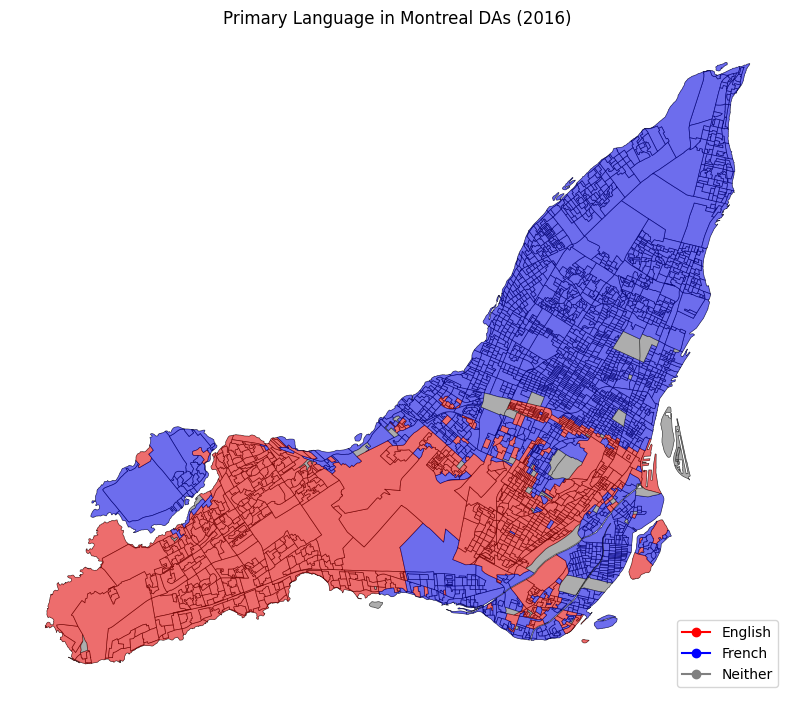

In [9]:
### 2016 Language Distribution Map###

#data
proj_merged_gdf2016['Language'] = 'Neither'
proj_merged_gdf2016.loc[proj_merged_gdf2016['English Only'] > proj_merged_gdf2016['French Only'], 'Language'] = 'English'
proj_merged_gdf2016.loc[proj_merged_gdf2016['French Only'] > proj_merged_gdf2016['English Only'], 'Language'] = 'French'

#map plot
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2016.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

#colors
colors = {'English': 'red', 'French': 'blue', 'Neither': 'gray'}
for lang, color in colors.items():
    proj_merged_gdf2016[proj_merged_gdf2016['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

#axis and legend    
ax.set_title('Primary Language in Montreal DAs (2016)')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

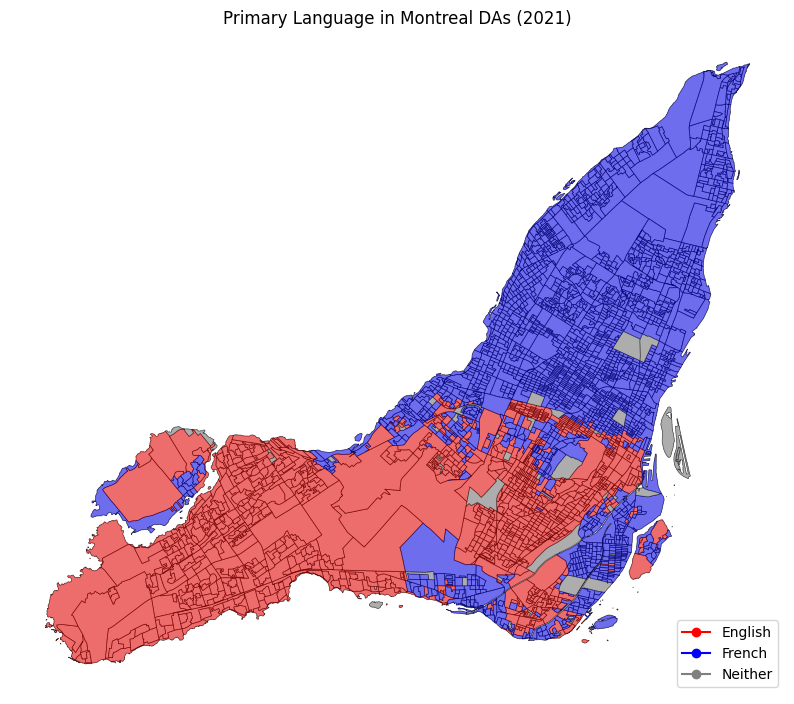

In [10]:
### 2021 Language Distribution Map ###

#data
proj_merged_gdf2021['Language'] = 'Neither'
proj_merged_gdf2021.loc[proj_merged_gdf2021['English Only'] > proj_merged_gdf2021['French Only'], 'Language'] = 'English'
proj_merged_gdf2021.loc[proj_merged_gdf2021['French Only'] > proj_merged_gdf2021['English Only'], 'Language'] = 'French'

#map plot
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

#colors
colors = {'English': 'red', 'French': 'blue', 'Neither': 'gray'}
for lang, color in colors.items():
    proj_merged_gdf2021[proj_merged_gdf2021['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )
    
#axis and legend
ax.set_title('Primary Language in Montreal DAs (2021)')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

### Upon close inspection, we can see an increase in predominantly english areas. Run the next code cell to see how much each area changed by.

Text(0, 0.5, 'Percentage Difference in French Language Distribution')

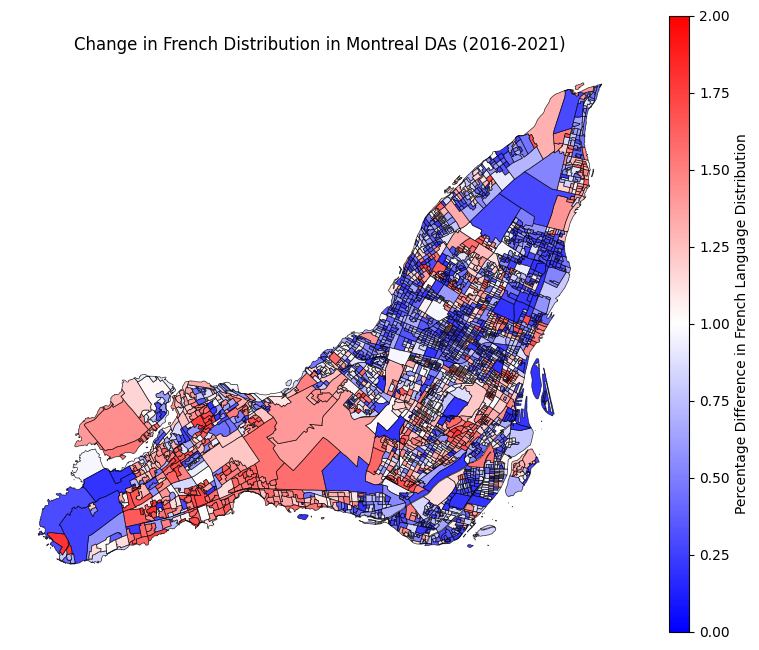

In [11]:
### net change in montreal language distribution between 2016-2021 ###

#data
french_diff = abs((proj_merged_gdf2021['French Only'] / proj_merged_gdf2021['Population']) - (proj_merged_gdf2016['French Only'] / proj_merged_gdf2016['Population']))
french_diff /= ((proj_merged_gdf2021['French Only'] / proj_merged_gdf2021['Population']) + (proj_merged_gdf2016['French Only'] / proj_merged_gdf2016['Population'])) / 2
french_diff = french_diff.fillna(0)

#map plot
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
norm = mpl.colors.Normalize(vmin=french_diff.min(), vmax=french_diff.max())
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    column=french_diff,
    cmap=cmap,
    norm=norm,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

#axis and legend
ax.set_title('Change in French Distribution in Montreal DAs (2016-2021)')
ax.set_axis_off()
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8, aspect=30, pad=0.05)
cbar.ax.set_ylabel('Percentage Difference in French Language Distribution')

### interesting
It seems that while the total number of pure english speakers is higher than pure french in many areas, some of those areas are seeing a slow shift to predominantly pure french speakers, this is espescially apparent near the bottom left of our map. But what about overall, has the ratio of pure french or pure english speakers changed? Run the next code cell to find out

In [12]:
### calculating the percentage difference between pure french and english speakers ###

def dif_calc(gdf1, gdf2):
    # total number of English and French speakers
    gdf1_english_speakers = gdf1['English Only'].sum()
    gdf2_english_speakers = gdf2['English Only'].sum()
    gdf1_french_speakers = gdf1['French Only'].sum()
    gdf2_french_speakers = gdf2['French Only'].sum()
    
    # Calculate the percentage difference in English and French speakers
    english_percentage_difference = ((gdf2_english_speakers - gdf1_english_speakers) / gdf1_english_speakers) * 100
    french_percentage_difference = ((gdf2_french_speakers - gdf1_french_speakers) / gdf1_french_speakers) * 100
    
    # store the results
    results = {
        'English Percentage Difference': english_percentage_difference,
        'French Percentage Difference': french_percentage_difference
    }
    
    return results

percentage_difference = dif_calc(proj_merged_gdf2016, proj_merged_gdf2021)
print(percentage_difference)

{'English Percentage Difference': 19.049131243478655, 'French Percentage Difference': -5.783908757605951}


### A downward trend?
As it turns out, while the ratio of pure french speakers is on the decline, pure english speakers have increased by quite a large margin. This lends so credence to the worries of many french speaking Canadians, perhaps french really should be protected more heavily. This is true despite the fact that Quebec's official language is French, this just goes to show that "in some cases, it is the official language that needs protection, because the minority language is the globally dominant language" (Charbonneau p.1). 

This being said, it's not as though Montreal is populated by nothing but pure french and pure english speakers, an extremely large portion of the city is predominantly bilingual, as can be seen in the next code cell.

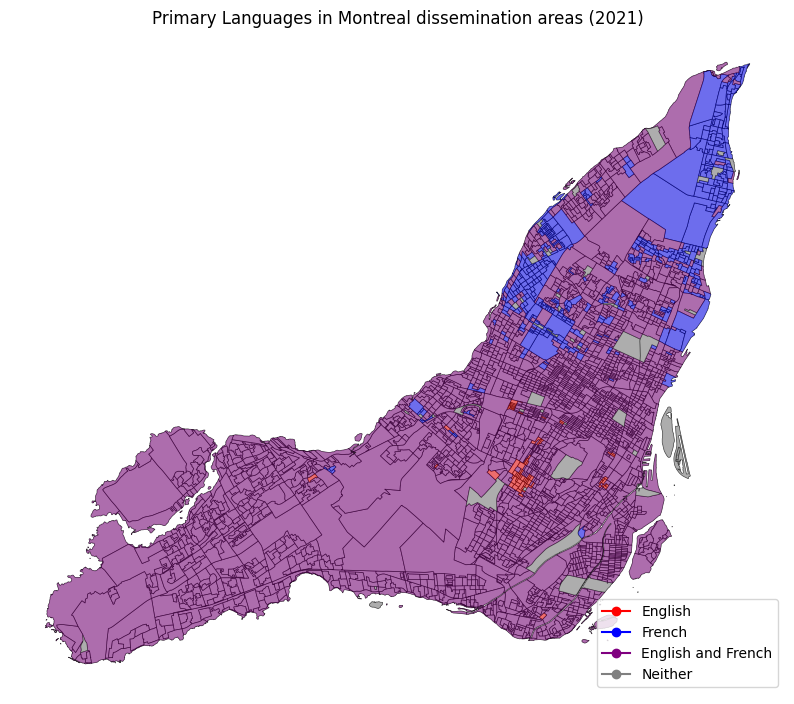

In [13]:
### most common language spoken at home 2021 ###

#data
proj_merged_gdf2021['Language'] = 'Neither'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['English Only'] > proj_merged_gdf2021[['French Only', 'English and French', 'Neither']].max(axis=1)), 'Language'] = 'English'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['French Only'] > proj_merged_gdf2021[['English Only', 'English and French', 'Neither']].max(axis=1)), 'Language'] = 'French'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['English and French'] > proj_merged_gdf2021[['French Only', 'English Only', 'Neither']].max(axis=1)), 'Language'] = 'English and French'

#map plot
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Colors
colors = {'English': 'red', 'French': 'blue', 'English and French': 'purple', 'Neither': 'gray'}
for lang, color in colors.items():
    proj_merged_gdf2021[proj_merged_gdf2021['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

#axis and legend
ax.set_title('Primary Languages in Montreal dissemination areas (2021)')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

## a clear difference
Here we can see that while pure english speakers may have an edge over the pure french ones, the same is not true when we consider bilingual areas. The number of  areas dominated by pure english speakers pales in comparison to those populated by pure french speakers. Billingualism takes the lead in stride, which is only natural when you consider that we all live in the same city, people are bound to interact, doubly so in the workplace. This brings us to our next section, how does the professional workplace factor into this? Run the next two code cells to find out!

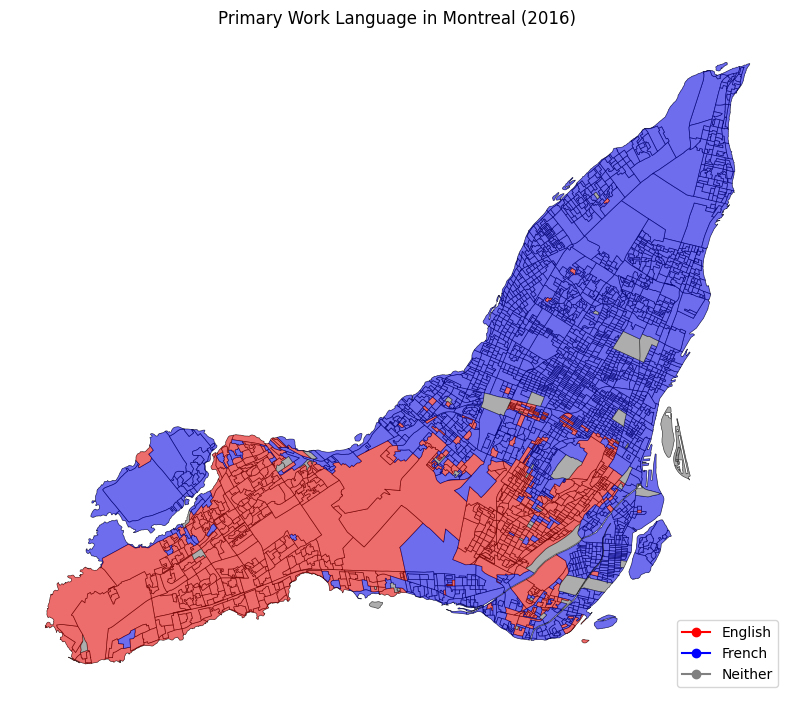

In [14]:
### primary work language in montreal 2016 ###

# data
proj_merged_gdf2016['Language'] = 'Neither'
proj_merged_gdf2016.loc[proj_merged_gdf2016['Work language: English'] > proj_merged_gdf2016['Work language: French'], 'Language'] = 'English'
proj_merged_gdf2016.loc[proj_merged_gdf2016['Work language: French'] > proj_merged_gdf2016['Work language: English'], 'Language'] = 'French'

# map plot
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2016.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Colors
colors = {'English': 'red', 'French': 'blue', 'Neither': 'gray'}
for lang, color in colors.items():
    proj_merged_gdf2016[proj_merged_gdf2016['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

# axis and legend
ax.set_title('Primary Work Language in Montreal (2016)')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

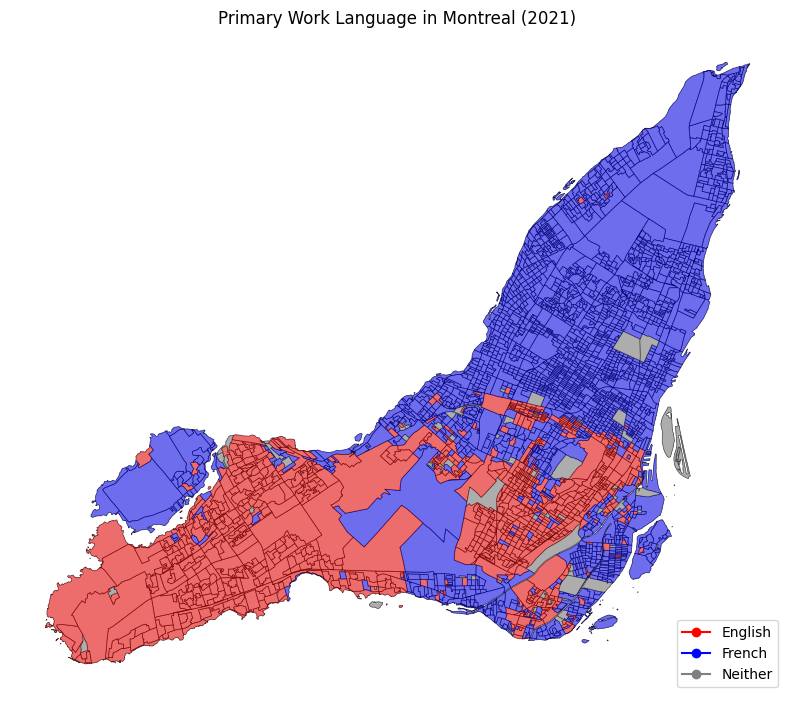

In [15]:
### primary work language in montreal 2021 ###

# data
proj_merged_gdf2021['Language'] = 'Neither'
proj_merged_gdf2021.loc[proj_merged_gdf2021['Work language: English'] > proj_merged_gdf2021['Work language: French'], 'Language'] = 'English'
proj_merged_gdf2021.loc[proj_merged_gdf2021['Work language: French'] > proj_merged_gdf2021['Work language: English'], 'Language'] = 'French'

# map plot
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Color
colors = {'English': 'red', 'French': 'blue', 'Neither': 'gray'}
for lang, color in colors.items():
    proj_merged_gdf2021[proj_merged_gdf2021['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

# axis and legend
ax.set_title('Primary Work Language in Montreal (2021)')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

## Language within the workforce
Contrary to what we saw in the pure english vs pure french maps, the opposite seems to be true here. French has become more common in the workplace, this is probably explainable by increased strictness surrounding the usage of french in professional contexts. Ever since the forcefull takedown of english store signage, things have gotten more and more intense. One clear example of this can be seen in the new legislation which states that "only people who attended English school in Canada will be allowed to receive health-care services in English" (Lurie). This is concerning, as english education is something which only affects people moving into the country; only children with parents who have recieved english education may also enroll in english education. 

This trend may tap into a common fear of those who lobby for the protection of the French language. This being the fear of immigrants, a clear indication of this fear can be seen in a french study seeking to tackle this very issue. In the study, a table called "Perception de L'Immigration Comme Menace À La Culture Québécoise Portrait des Régions Administratives" detailed what the average person in French Canadian areas thought of immigrants, it's no surprise that 32.9% of Quebecers labled immigrants as a "menace to quebec culture" (Bilodeau et al. p.288). But just how much has immigration increased, run the next three cells to find out!

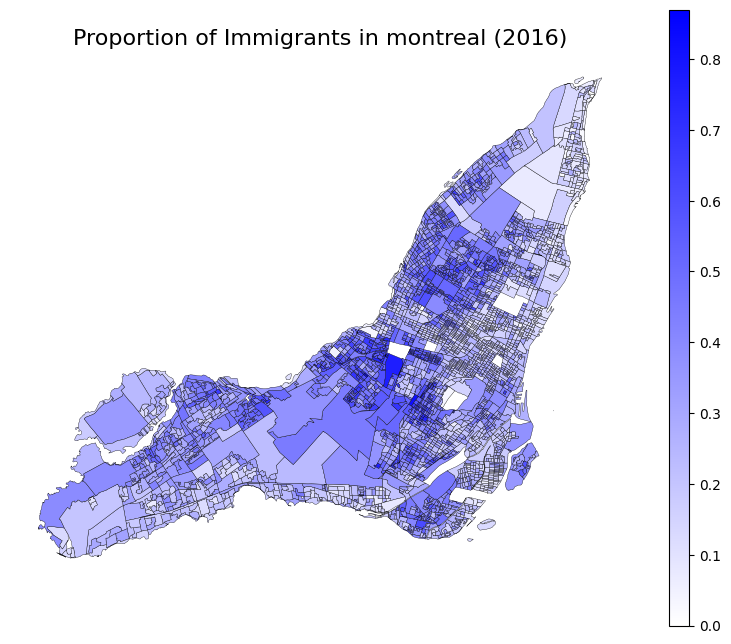

In [16]:
### immigrant map 2016 ###

# data
proj_merged_gdf2016['Proportion Immigrants'] = proj_merged_gdf2016['Immigrants'] / proj_merged_gdf2016['Population']


# color map
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white", "blue"])
norm = mpl.colors.Normalize(vmin=proj_merged_gdf2016['Proportion Immigrants'].min(), vmax=proj_merged_gdf2016['Proportion Immigrants'].max())
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2016.plot(column='Proportion Immigrants', cmap=cmap, norm=norm, linewidth=0.25, edgecolor='black', ax=ax)

# axis and legend
plt.title('Proportion of Immigrants in montreal (2016)', fontsize=16)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8, aspect=30, pad=0.05)

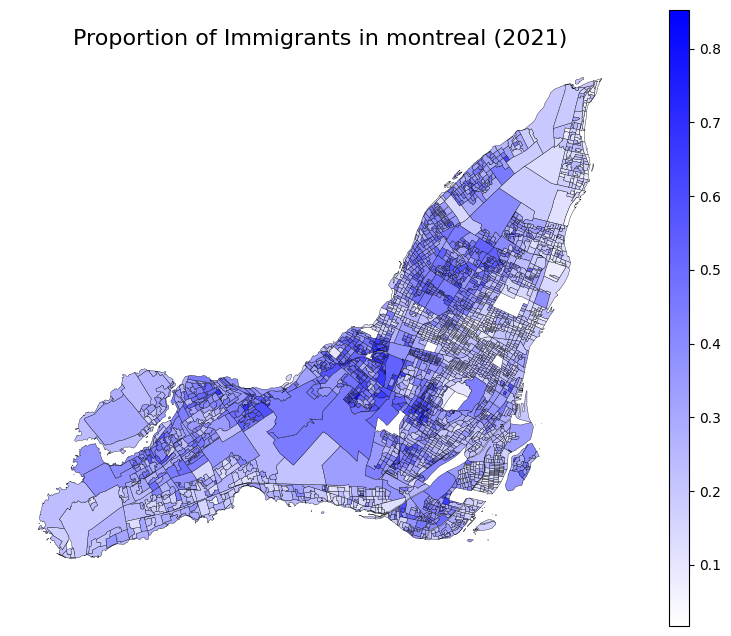

In [17]:
### immigrant map 2021 ###

# data
proj_merged_gdf2021['Proportion Immigrants'] = proj_merged_gdf2021['Immigrants'] / proj_merged_gdf2021['Population']

# color map
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white", "blue"])
norm = mpl.colors.Normalize(vmin=proj_merged_gdf2021['Proportion Immigrants'].min(), vmax=proj_merged_gdf2021['Proportion Immigrants'].max())
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(column='Proportion Immigrants', cmap=cmap, norm=norm, linewidth=0.25, edgecolor='black', ax=ax)

# axis and legend
plt.title('Proportion of Immigrants in montreal (2021)', fontsize=16)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8, aspect=30, pad=0.05)

## what do the maps tell us?
While we can certainly see slight variations between both maps, it is difficult to tell what the trend is due to these maps being made with ratios in mind. To solve this issue, let's run the last few code cells!

In [18]:
### calculating percentage increase of immigrants in montreal ###

immigrants_diff = ((proj_merged_gdf2021['Immigrants'].sum()-proj_merged_gdf2016['Immigrants'].sum())/proj_merged_gdf2016['Immigrants'].sum())*100
print("% Increase in Immigrants between 2016 and 2021: ", immigrants_diff)

% Increase in Immigrants between 2016 and 2021:  1.2429343485643836


Text(0.5, 1.0, 'Correlation between Immigrants and Bilingualism (2021)')

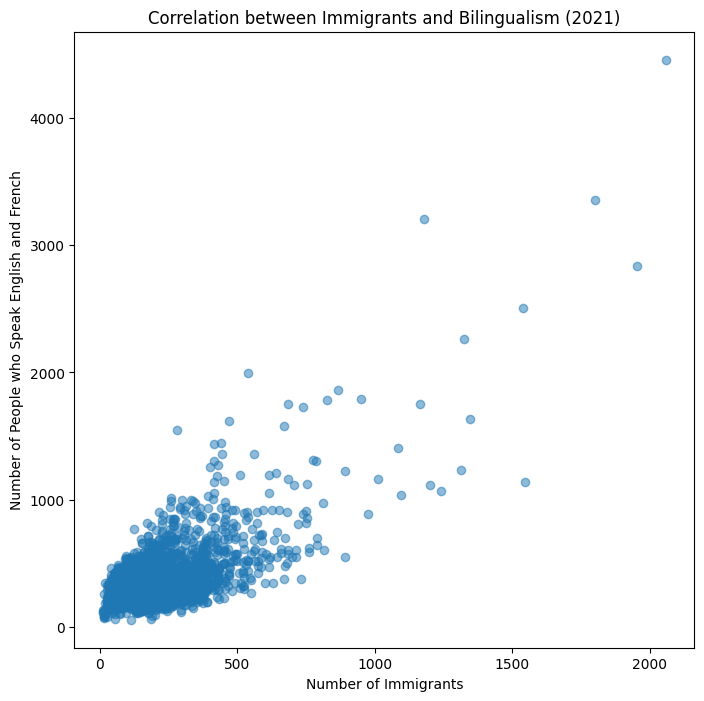

In [19]:
### scatter plot to visualize the correlation between immigrants and bilingualism ###

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(proj_merged_gdf2021['Immigrants'], proj_merged_gdf2021['English and French'], alpha=0.5)
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of People who Speak English and French')
ax.set_title('Correlation between Immigrants and Bilingualism (2021)')

## Immigration discussed
while there is certainly a slight increase in immigrants within montreal, a near 1% increase in 5 years is nothing incredibly alarming. This is espescially true because of the numerous war related disaasters which have forced so many from their homes in recent years. On the correlation between immigrants and bilingualism, there appears to be a slight positive trend. This is likely due to the rule forcing the children of non english educated parents to go to french school. Contrary to posing a risk to the French language, immigrants only serve to bolster the french speaking population.

#### conclusion
In conclusion, the fears surrounding the security of French in Montreal are not all incorrect. The data has shown a slight increase in pure english speakers, and a decrease in pure french ones. While data has shown that the overall population still does speak a good bit of french, this does mean that most people are beggining to speak both languages, which could anger many passionate French speaking Canadians. Where do these pure english speakers come from then? If it isnt from overseas immigration, then the next best answer would be internal migration within Canada. I only hope that the measures taken to protect the sanctity of the French language do not become too drastic, but with recent developments it seems this may very well be the case.

## Works Cited

#### Bilodeau, Antoine, and Luc Turgeon. “L’immigration : Une Menace Pour La Culture Québécoise? Portrait et Analyses Des Perceptions Régionales.” Canadian Journal of Political Science / Revue Canadienne de Science Politique, vol. 47, no. 2, 2014, pp. 281–305. JSTOR, http://www.jstor.org/stable/43298418.

#### Charbonneau, François. “The Art of Defining Linguistic Minorities in Quebec and Canada.” Harvard Ukrainian Studies, vol. 35, no. 1/4, 2017, pp. 493–511. JSTOR, http://www.jstor.org/stable/44983555.

#### Lieberson, Stanley. “Bilingualism in Montreal: A Demographic Analysis.” American Journal of Sociology, vol. 71, no. 1, 1965, pp. 10–25. JSTOR, http://www.jstor.org/stable/2774765.

#### Lurie, R. (2021, November 18). Quebec doctors who provide care in English say they're concerned about new language legislation. Montreal. Retrieved from https://montreal.ctvnews.ca/quebec-doctors-who-provide-care-in-english-say-they-re-concerned-about-new-language-legislation-1.5672255 